In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [3]:
def test(f_loss_file):    
    train_losses = []
    val_losses = []
    val_aurocs = []

    bag_test_aurocs = []

    f_loss = open(f_loss_file)
    count = -1
    params = ''
    for line_loss in f_loss:
        # print(line_loss)
        if count == -1:
            params = line_loss
        count += 1
        if count > 0:
            train_losses.append(float(line_loss.split(', ')[1]))
            val_losses.append(float(line_loss.split(', ')[2]))
            val_aurocs.append(float(line_loss.split(', ')[3]))
            bag_test_aurocs.append(float(line_loss.split(',')[4]))
    # print(len(val_aurocs) - np.argmax(val_aurocs))
    return bag_test_aurocs[np.argmax(val_aurocs)]

1 100.0 abdmil
0.906 (0.892, 0.920)
0.980 (0.976, 0.984)

1 100.0 DAS_transformer
0.930 (0.797, 1.063)
0.000 (0.000, 0.000)

1 100.0 transmil
0.981 (0.931, 1.031)
0.957 (0.890, 1.024)


2 88.8888888888889 abdmil
0.897 (0.881, 0.913)
0.967 (0.961, 0.972)

2 88.8888888888889 DAS_transformer
0.642 (0.515, 0.768)
0.000 (0.000, 0.000)

2 88.8888888888889 transmil
0.747 (0.719, 0.775)
0.619 (0.549, 0.689)


3 77.77777777777779 abdmil
0.916 (0.903, 0.929)
0.957 (0.952, 0.962)

3 77.77777777777779 DAS_transformer
0.618 (0.464, 0.771)
0.000 (0.000, 0.000)

3 77.77777777777779 transmil
0.654 (0.596, 0.712)
0.554 (0.501, 0.608)


4 66.66666666666666 abdmil
0.919 (0.902, 0.937)
0.954 (0.948, 0.961)

4 66.66666666666666 DAS_transformer
0.630 (0.515, 0.745)
0.000 (0.000, 0.000)

4 66.66666666666666 transmil
0.608 (0.541, 0.675)
0.527 (0.504, 0.549)


5 55.55555555555556 abdmil
0.903 (0.888, 0.918)
0.949 (0.940, 0.958)

5 55.55555555555556 DAS_transformer
0.634 (0.494, 0.773)
0.000 (0.000, 0.000)

5 

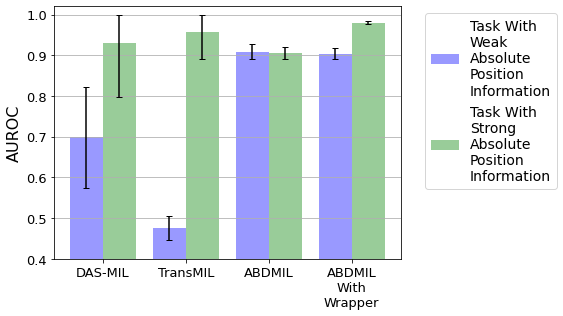

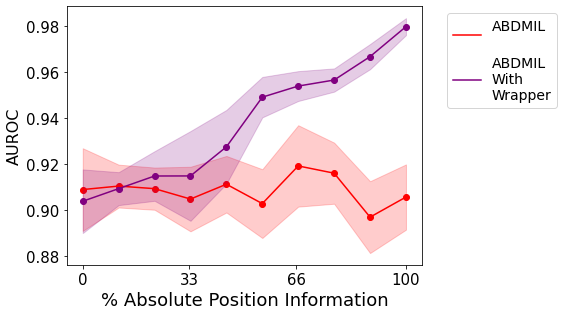

In [16]:
bagrocs = {}
bagrocs_pe = {}
bagrocs_linearpe = {}

bagrocs_iqr = {}
bagrocs_pe_iqr = {}
bagrocs_linearpe_iqr = {}

bagrocs_diff = {}
bagrocs_diff_iqr = {}

bagrocs_diff_pecomp = {}
bagrocs_diff_pecomp_iqr = {}

bagrocs_diff_lintoreg = {}
bagrocs_diff_lintoreg_iqr = {}


gpi = [100.0, 88.8888888888889, 77.77777777777779, 66.66666666666666, 55.55555555555556, 44.44444444444445, 33.333333333333336, 22.222222222222225, 11.111111111111112, 0.0]
all_models = ['abdmil', 'DAS_transformer', 'transmil']

proper_labels1 = ['ABDMIL\n', 'DAS-MIL\nWithout Wrapper', 'TransMIL\nWithout Wrapper']
proper_labels2 = ['ABDMIL\nWith\nWrapper', 'DAS-MIL', 'TransMIL']
plotted_models = ['abdmil', 'DAS_transformer', 'transmil']
colors = ['red', 'green']

fig, ax = plt.subplots()
fig.set_figheight(4.5)
fig.set_figwidth(8)

fig2, ax2 = plt.subplots()
fig2.set_figheight(4.5)
fig2.set_figwidth(8)

COUNT = -1
labs = ['a', 'b', 'c']
for num_bags in [100]:
    COUNT += 1
    for model in all_models:
        bagrocs[model] = []
        bagrocs_pe[model] = []
        bagrocs_linearpe[model] = []

        bagrocs_iqr[model] = []
        bagrocs_pe_iqr[model] = []
        bagrocs_linearpe_iqr[model] = []

        bagrocs_diff[model] = []
        bagrocs_diff_iqr[model] = []

        bagrocs_diff_pecomp[model] = []
        bagrocs_diff_pecomp_iqr[model] = []

        bagrocs_diff_lintoreg[model] = []
        bagrocs_diff_lintoreg_iqr[model] = []


    for perm_dist in range(1, 11):
        for model in all_models:
            currbr = []
            currbrpe = []
            currbrlinearpe = []
            for seed in range(10):
                if model == 'transmil':
                    nope = 'transformer'
                    linearpe = 'transformer_linearpe'
                    pe = 'transmil'
                else:
                    nope = model
                    pe = model + '_pe'
                    linearpe = model + '_linearpe'

                try:
                    f_loss_file = '/data2/meerak/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, nope)
                    currbr.append(test(f_loss_file))
                except:
                    error = 1
                    currbr.append(0)
                try:
                    f_loss_file = '/data2/meerak/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, pe)
                    currbrpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrpe.append(0)

                try:
                    f_loss_file = '/data2/meerak/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, linearpe)
                    currbrlinearpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrlinearpe.append(0)

            print(perm_dist, gpi[perm_dist - 1], model)
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbr), np.median(currbr) - stats.iqr(currbr)/2, np.median(currbr) + stats.iqr(currbr)/2))
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbrpe), np.median(currbrpe) - stats.iqr(currbrpe)/2, np.median(currbrpe) + stats.iqr(currbrpe)/2))
            
            bagrocs[model].append(np.median(currbr))
            bagrocs_pe[model].append(np.median(currbrpe))
            bagrocs_linearpe[model].append(np.median(currbrlinearpe))

            bagrocs_iqr[model].append(stats.iqr(currbr)/2)
            bagrocs_pe_iqr[model].append(stats.iqr(currbrpe)/2)
            bagrocs_linearpe_iqr[model].append(stats.iqr(currbrlinearpe)/2)

            bagrocs_diff[model].append(np.median(np.array(currbrpe) - np.array(currbr)))
            bagrocs_diff_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbr))/2)

            bagrocs_diff_pecomp[model].append(np.median(np.array(currbrpe) - np.array(currbrlinearpe)))
            bagrocs_diff_pecomp_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbrlinearpe))/2)

            bagrocs_diff_lintoreg[model].append(np.median(np.array(currbrlinearpe) - np.array(currbr)))
            bagrocs_diff_lintoreg_iqr[model].append(stats.iqr(np.array(currbrlinearpe) - np.array(currbr))/2)


            print()
        print()

    x = np.array(list(range(1, 5)))
    curryerr = [[bagrocs_iqr['DAS_transformer'][9], bagrocs_iqr['DAS_transformer'][9]]]
    curryerr.append([bagrocs_pe_iqr['transmil'][9], bagrocs_pe_iqr['transmil'][9]])
    curryerr.append([bagrocs_iqr['abdmil'][9], bagrocs_iqr['abdmil'][9]])
    curryerr.append([bagrocs_pe_iqr['abdmil'][9], bagrocs_pe_iqr['abdmil'][9]])
    curryerr = np.array(curryerr)
    curryerr = curryerr.T
    ax.bar(x - 0.2, [bagrocs['DAS_transformer'][9], bagrocs_pe['transmil'][9], bagrocs['abdmil'][9], bagrocs_pe['abdmil'][9]], yerr = curryerr, width=0.4, align='center', color='blue', alpha=0.4, capsize=3, label = 'Task With\nWeak\nAbsolute\nPosition\nInformation')
    
    curryerr = [[bagrocs_iqr['DAS_transformer'][0], 1 - bagrocs['DAS_transformer'][0]]]
    curryerr.append([bagrocs_pe_iqr['transmil'][0], 1 - bagrocs_pe['transmil'][0]])
    curryerr.append([bagrocs_iqr['abdmil'][0], bagrocs_iqr['abdmil'][0]])
    curryerr.append([bagrocs_pe_iqr['abdmil'][0], bagrocs_pe_iqr['abdmil'][0]])
    curryerr = np.array(curryerr)
    curryerr = curryerr.T
    ax.bar(x + 0.2, [bagrocs['DAS_transformer'][0], bagrocs_pe['transmil'][0], bagrocs['abdmil'][0], bagrocs_pe['abdmil'][0]], yerr = curryerr, width=0.4, align='center', color='green',  alpha=0.4, capsize=3, label = 'Task With\nStrong\nAbsolute\nPosition\nInformation')
   
    ax.set_xticks(range(1, 5))
    ax.set_xticklabels(['DAS-MIL', 'TransMIL', 'ABDMIL', 'ABDMIL\nWith\nWrapper'])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)

    if COUNT == 0:
        for i, model in enumerate(['abdmil']):
            ax2.scatter(gpi, np.array(bagrocs[model]), color = 'red')
            ax2.plot(gpi, np.array(bagrocs[model]), label = proper_labels1[i], color = 'red')
            ax2.fill_between(gpi, np.array(bagrocs[model]) - np.array(bagrocs_iqr[model]), np.array(bagrocs[model]) + np.array(bagrocs_iqr[model]), alpha=0.2, color = 'red')

            ax2.scatter(gpi, np.array(bagrocs_pe[model]), color = 'purple')
            ax2.plot(gpi, np.array(bagrocs_pe[model]), label = proper_labels2[i], color = 'purple')
            ax2.fill_between(gpi, np.array(bagrocs_pe[model]) - np.array(bagrocs_pe_iqr[model]), np.array(bagrocs_pe[model]) + np.array(bagrocs_pe_iqr[model]), alpha=0.2, color = 'purple')

        for tick in ax2.xaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        for tick in ax2.yaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        ymin, ymax = ax2.get_ylim()
        xmin, xmax = ax2.get_xlim()
        ax2.set_xticks([0, 33, 66, 100], labels = [0, 33, 66, 100])

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
ax.yaxis.grid(True)
ax.set_ylabel('AUROC', fontsize=16)
ax.set_ylim(0.4, 1.02)

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
ax2.set_ylabel('AUROC', fontsize=16)
ax2.set_xlabel('% Absolute Position Information', fontsize=18)



fig.tight_layout()
fig.savefig('synth_plot_0vs100.png')


fig2.tight_layout()
fig2.savefig('synth_plot_abdmil.png')

In [8]:
curryerr

array([list([0.12382200723749998, 0.12382200723749998]),
       list([[0.029847773937500016, 0.029847773937500016]]),
       list([0.017983810837500003, 0.017983810837500003]),
       list([0.013849063837500009, 0.013849063837500009])], dtype=object)

In [10]:
[bagrocs['DAS_transformer'][9], bagrocs_pe['transmil'][9], bagrocs['abdmil'][9], bagrocs_pe['abdmil'][9]]

[0.69835725095, 0.4758796079, 0.90898673915, 0.9039015644999999]

In [14]:
curryerr.shape

(4,)